# Lead Score - Case Study

In [54]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# 1 : Loading and Cleaning Data


In [16]:
# Loading the data
df = pd.read_csv('Leads.csv')
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [17]:
# datframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [18]:
# shape
df.shape

(9240, 37)

In [19]:
#some stats on columns
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [20]:
#Replace 'Select' with NaN
df = df.replace('Select',np.nan)

In [21]:
#unique values for each column
df.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [22]:
#Dropping unique valued columns
df1= df.drop(['Magazine','Receive More Updates About Our Courses','I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content'],axis=1)

In [23]:
#missing values
round(100*(df1.isnull().sum()/len(df1.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Educatio

In [42]:
#Removing all the columns that are not required or columns that are generated by sales team or have 35% null values
df2 = df1.drop(['Last Activity','Last Notable Activity','Lead Profile','Tags','Lead Quality','Asymmetrique Profile Index','Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Score','Lead Number','How did you hear about X Education','City','Specialization','Prospect ID'],axis=1)
df2.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview
0,API,Olark Chat,No,No,0,0.0,0,0.0,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No
1,API,Organic Search,No,No,0,5.0,674,2.5,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,India,Student,Better Career Prospects,No,No,No,No,No,No,Yes
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No


In [43]:
# Recheck missing values
round(100*(df2.isnull().sum()/len(df2.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Country                                          26.63
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Recommendations                           0.00
A free copy of Mastering The Interview            0.00
dtype: flo

In [44]:
#imputing numeric values
df2['Page Views Per Visit']=df2['Page Views Per Visit'].fillna(df2['Page Views Per Visit'].mean())
df2['TotalVisits']=df2['TotalVisits'].fillna(df2['TotalVisits'].mean())

In [45]:
#imputing categorical values
df2['What matters most to you in choosing a course'] = df2['What matters most to you in choosing a course'].fillna(df2['What matters most to you in choosing a course'].mode()[0])
df2['Country'] = df2['Country'].fillna(df2['Country'].mode()[0])
df2['What is your current occupation'] = df2['What is your current occupation'].fillna(df2['What is your current occupation'].mode()[0])
df2['Lead Source'] = df2['Lead Source'].fillna(df2['Lead Source'].mode()[0])
#df2.info()

In [48]:
#value freq for different columns
for column in df2:
    print(df2[column].astype('category').value_counts())
    print('----------------------------------------------------------------------------------------')

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
----------------------------------------------------------------------------------------
Google               2904
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
WeLearn                 1
Pay per Click Ads       1
NC_EDM                  1
blog                    1
testone                 1
welearnblog_Home        1
youtubechannel          1
Name: Lead Source, dtype: int64
----------------------------------------------------------------------------------------
No     8506
Yes     734
Name: Do Not Email, dtype: i

In [47]:
#Replace unknown with India as it is a mode value
df2["Country"]=df2["Country"].apply(lambda x: 'India' if x=='unknown' else x)

In [59]:
# Removing highly skewed columns
df_model = df2.drop([ 'Do Not Call', 'Country',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations'],axis=1
    )
df_model.shape

(9240, 9)

## 2. EDA

In [60]:
for col in df_model:
  fig = px.histogram(df_model, x=col, color="Converted")
  fig.show()

## 3. Model data preperation

In [61]:
#Finding categorical valriables
df_model.loc[:, df_model.dtypes == 'object'].columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email',
       'What is your current occupation',
       'A free copy of Mastering The Interview'],
      dtype='object')

In [62]:
# dummifying the categorical variables
dummy = pd.get_dummies(df_model[['Lead Origin' ,'Lead Source', 'Do Not Email', 'What is your current occupation','A free copy of Mastering The Interview']], drop_first=True)
df_model_dummy = pd.concat([df_model, dummy], axis=1)
df_model_dummy.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,What is your current occupation,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,...,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_Yes,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes
0,API,Olark Chat,No,0,0.0,0,0.0,Unemployed,No,0,...,0,0,0,0,0,0,0,1,0,0
1,API,Organic Search,No,0,5.0,674,2.5,Unemployed,No,0,...,0,0,0,0,0,0,0,1,0,0
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Student,Yes,1,...,0,0,0,0,0,0,1,0,0,1
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unemployed,No,1,...,0,0,0,0,0,0,0,1,0,0
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Unemployed,No,1,...,0,0,0,0,0,0,0,1,0,0


In [64]:
#dropping redundant columns
df_model_dummy = df_model_dummy.drop(['Lead Origin' ,'Lead Source', 'Do Not Email', 'What is your current occupation','A free copy of Mastering The Interview'], 1)
df_model_dummy.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,...,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_Yes,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,2.0,1532,2.0,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
3,0,1.0,305,1.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [65]:
# Import the required library
from sklearn.model_selection import train_test_split

In [80]:
X = df_model_dummy.drop(['Converted'], 1)
y = df_model_dummy['Converted']

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_Yes,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2.0,1532,2.0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
3,1.0,305,1.0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,2.0,1428,1.0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [195]:
# Split into 70 and 30
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=10)

In [196]:
# Scaling the numerical columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_Yes,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes
3112,-0.279316,-0.135374,-0.157084,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
8413,0.316100,1.905574,1.294448,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2961,-0.080844,1.389409,-0.640928,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
24,0.514572,1.186956,-0.399006,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
2740,-0.080844,0.942553,0.326760,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


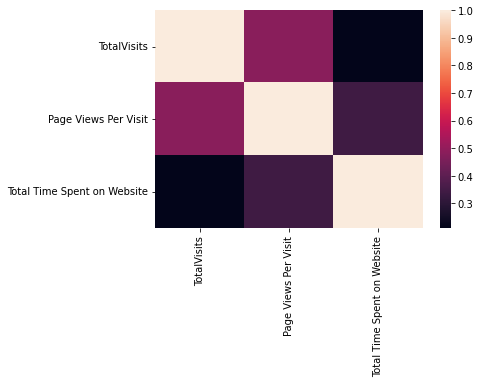

In [197]:
# To check the correlation for numeric variables
sns.heatmap(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']].corr())
plt.show()

## 4. Model Building 

In [198]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
#rfe = RFE(logreg)

In [199]:
# Running RFE with 15 variables as output
rfe = RFE(logreg,n_features_to_select=12)
rfe = rfe.fit(X_train, y_train)

In [200]:
# Features that have been selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 14),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 18),
 ('Lead Origin_Landing Page Submission', False, 21),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 16),
 ('Lead Origin_Quick Add Form', False, 23),
 ('Lead Source_Direct Traffic', False, 9),
 ('Lead Source_Facebook', False, 17),
 ('Lead Source_Google', False, 13),
 ('Lead Source_Live Chat', False, 8),
 ('Lead Source_NC_EDM', False, 3),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 22),
 ('Lead Source_Pay per Click Ads', False, 12),
 ('Lead Source_Press_Release', False, 7),
 ('Lead Source_Reference', False, 19),
 ('Lead Source_Referral Sites', False, 2),
 ('Lead Source_Social Media', False, 6),
 ('Lead Source_WeLearn', False, 4),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', True, 1),
 ('Lead Source_blog', False, 5),
 ('Lead Source_google', True, 1),
 ('Lead Source_testone', False, 11),
 ('Lead Sou

In [201]:
# Put all the columns selected by RFE in the variable 'col'
col = X_train.columns[rfe.support_]

In [202]:
# Selecting columns selected by RFE
X_train = X_train[col]

In [203]:
# Importing statsmodels
import statsmodels.api as sm

In [204]:
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3042.3
Date:                Tue, 18 Oct 2022   Deviance:                       6084.6
Time:                        09:31:55   Pearson chi2:                 7.69e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1877      1.314     -0.143      0.886      -2.762       2.387
Total Time Spent on Website                              1.0968      0.037     29.346      0.000       1.024       1.170
Lead Origin_Lead Add Form                                3.8814      0.193     20.076      0.000       3.502       4.260
Lead Source_Olark Chat                                   0.6831      0.091      7.514      0.000       0.505       0.861
Lead Source_Welingak Website                             2.6549      1.025      2.590      0.010       0.646       4.664
Lead Source_bing                                       -21.0651   2.13e+04     -0.001      0.999   -4.18e+04    4.18e+04
Lead Source_google                                     -21.9956   2.43e+04     -0.001      0.999   -4.76e+04    4.75e+04
Do Not Email_Yes                                        -1.4124      0.155     -9.116      0.000      -1.716      -1.109
What is your current occupation_Housewife               21.0846   1.83e+04      0.001      0.999   -3.59e+04     3.6e+04
What is your current occupation_Other                   -0.9012      1.555     -0.580      0.562      -3.949       2.147
What is your current occupation_Student                 -0.5789      1.327     -0.436      0.663      -3.180       2.023
What is your current occupation_Unemployed              -0.8388      1.313     -0.639      0.523      -3.413       1.735
What is your current occupation_Working Professional     1.9933      1.324      1.505      0.132      -0.602       4.589
========================================================================================================================
"""

In [205]:
# Importing 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [206]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Source_Olark Chat,1.54
10,What is your current occupation_Unemployed,1.51
1,Lead Origin_Lead Add Form,1.48
0,Total Time Spent on Website,1.26
3,Lead Source_Welingak Website,1.24
11,What is your current occupation_Working Profes...,1.15
6,Do Not Email_Yes,1.10
9,What is your current occupation_Student,1.02
7,What is your current occupation_Housewife,1.01
4,Lead Source_bing,1.00


In [207]:
X_train.drop(['Lead Source_bing','Lead Source_google','What is your current occupation_Housewife','What is your current occupation_Other','What is your current occupation_Student','What is your current occupation_Unemployed','What is your current occupation_Working Professional'], axis = 1, inplace = True)

In [208]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6462
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3252.4
Date:                Tue, 18 Oct 2022   Deviance:                       6504.8
Time:                        09:33:14   Pearson chi2:                 6.61e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -0.8461      0.038    -22.050      0.000      -0.921      -0.771
Total Time Spent on Website      1.1176      0.036     30.705      0.000       1.046       1.189
Lead Origin_Lead Add Form        4.1694      0.188     22.217      0.000       3.802       4.537
Lead Source_Olark Chat           0.6395      0.088      7.288      0.000       0.468       0.812
Lead Source_Welingak Website     2.2154      1.025      2.162      0.031       0.207       4.223
Do Not Email_Yes                -1.4665      0.150     -9.746      0.000      -1.761      -1.172
================================================================================================
"""

In [209]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Lead Add Form,1.24
3,Lead Source_Welingak Website,1.22
0,Total Time Spent on Website,1.16
2,Lead Source_Olark Chat,1.14
4,Do Not Email_Yes,1.01


## 5. Model evaluation

In [212]:
# Predicting the probabilities on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)

# Data frame with given convertion rate and probablity of predicted ones
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})


In [213]:
# Starting with the cut off of 0.5 and predicting
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)


In [214]:
# Importing metrics from sklearn for evaluation
from sklearn import metrics
# Creating confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3462,  492],
       [ 952, 1562]])

In [211]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.7767470624613482

Overall accuracy of 77% on train data

In [170]:
# Other evaluation metrics
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1] 
FN = confusion[1,0]

In [171]:
# sensitivity
TP/(TP+FN)

0.6213206046141607

In [172]:
# specificity
TN/(TN+FP)

0.8755690440060698

Sensitivity at 62% and specificity at 87%

## 6. Optimizing the parameters

In [216]:
# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [217]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

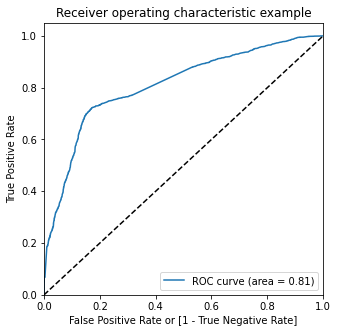

In [218]:
# Call the ROC function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

In [219]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.269457,0,1,1,1,0,0,0,0,0,0,0
1,1,0.783071,1,1,1,1,1,1,1,1,1,0,0
2,1,0.992432,1,1,1,1,1,1,1,1,1,1,1
3,1,0.617866,1,1,1,1,1,1,1,1,0,0,0
4,0,0.551652,1,1,1,1,1,1,1,0,0,0,0


In [220]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.388683,1.000000,0.000000
0.1,0.1,0.439703,0.994431,0.087001
0.2,0.2,0.583024,0.912888,0.373293
0.3,0.3,0.774119,0.733095,0.800202
0.4,0.4,0.790198,0.688942,0.854578
0.5,0.5,0.776747,0.621321,0.875569
0.6,0.6,0.752319,0.515911,0.902630
0.7,0.7,0.723253,0.392601,0.933485
0.8,0.8,0.693723,0.260541,0.969145
0.9,0.9,0.677180,0.187351,0.988619


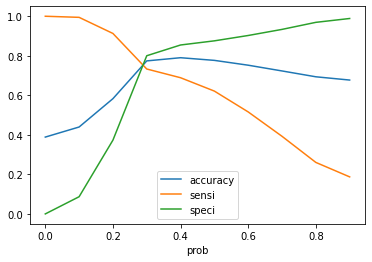

In [221]:
# Plotting it
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [222]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.3 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.269457,0,1,1,1,0,0,0,0,0,0,0,0
1,1,0.783071,1,1,1,1,1,1,1,1,1,0,0,1
2,1,0.992432,1,1,1,1,1,1,1,1,1,1,1,1
3,1,0.617866,1,1,1,1,1,1,1,1,0,0,0,1
4,0,0.551652,1,1,1,1,1,1,1,0,0,0,0,1


In [223]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7741187384044527

In [224]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3164,  790],
       [ 671, 1843]])

In [225]:
# Substituting the value of true positive
TP = confusion2[1,1]
TN = confusion2[0,0]
FP = confusion2[0,1] 
FN = confusion2[1,0]

In [226]:
# Calculating the sensitivity
TP/(TP+FN)

0.7330946698488464

In [227]:
# Calculating the specificity
TN/(TN+FP)

0.8002023267577137

## 7. Prediction on Test set

In [228]:
# Scaling numeric values
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [229]:
# Substituting all the columns in the final train model
col = X_train.columns

In [230]:
# Select the columns in X_train for X_test as well
X_test = X_test[col]
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test[col])


,const,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Do Not Email_Yes
567,1.0,-0.281286,0,0,0,0
2303,1.0,1.943876,0,0,0,0
1523,1.0,1.564504,0,0,0,0
6923,1.0,-0.545752,0,0,0,0
7841,1.0,0.393558,0,0,0,0
...,...,...,...,...,...,...
9124,1.0,-0.401664,0,0,0,0
1049,1.0,2.004065,0,0,0,0
7778,1.0,-0.330531,0,0,0,0
6432,1.0,-0.886822,0,1,0,0


In [231]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})


In [232]:
# Making prediction using cut off 0.3
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.3 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.238585,0
1,0,0.790254,1
2,0,0.711455,1
3,0,0.189075,0
4,0,0.399817,1
...,...,...,...
2767,0,0.215009,0
2768,0,0.801187,1
2769,0,0.228731,0
2770,0,0.231887,0


In [233]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7770562770562771

In [234]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1388,  337],
       [ 281,  766]])

In [235]:
# Other evaluation metrics
TP = confusion2[1,1]
TN = confusion2[0,0]
FP = confusion2[0,1] 
FN = confusion2[1,0]

In [236]:
# Calculating the sensitivity
TP/(TP+FN)

0.731614135625597

In [237]:
# Calculating the specificity
TN/(TN+FP)

0.8046376811594202

sensitivity at 73% and specificity at 80%

In [238]:
# Precision
TP / (TP + FP)

0.6944696282864914

In [239]:
#Recall 
TP / (TP + FN)

0.731614135625597

Precision at 69% and recall at 73%